In [1]:
print("Asdasd")

Asdasd


In [22]:
 import pandas as pd
 import numpy as numpy
 import matplotlib.pyplot as plt
 import seaborn as sns
 import sklearn
 from statsmodels.formula.api import ols

In [8]:
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
height = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]

In [33]:
df = pd.DataFrame({'height' : height,
                   'weight' : weights})
df.head()

,height,weight
0,187,87
1,174,81
2,179,82
3,192,92
4,188,90


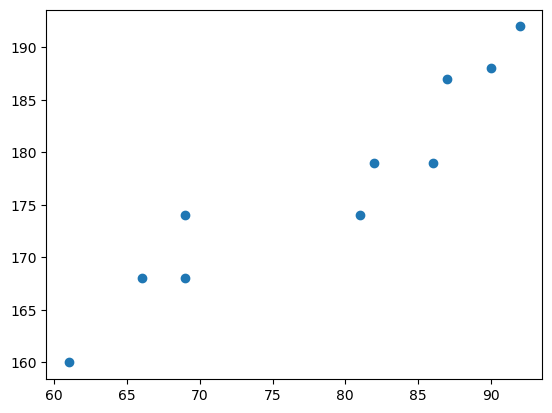

In [10]:
plt.scatter(df['weight'], df['height'])

<AxesSubplot:xlabel='weight', ylabel='height'>

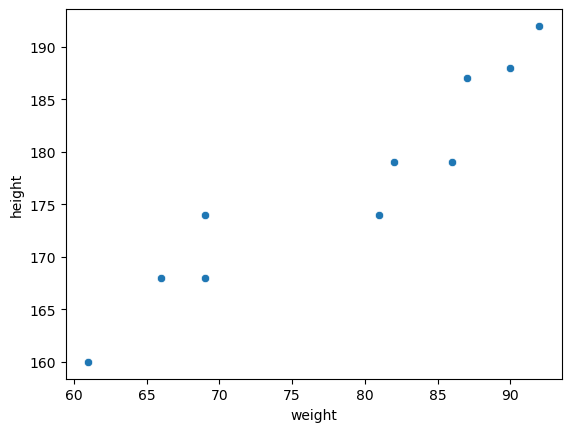

In [11]:
sns.scatterplot(data=df, x='weight', y='height')
plt.title()

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [13]:
X = df[['weight']]
y = df[['height']]

In [14]:
X.head()

,weight
0,87
1,81
2,82
3,92
4,90


In [16]:
y.head()

,height
0,187
1,174
2,179
3,192
4,188


In [17]:
reg.fit(X, y)

LinearRegression()

In [23]:
w1 = reg.coef_[0][0]
w0 = reg.intercept_[0]

In [26]:
print(f'y = {round(w1, 2)}x + {round(w0, 2)}')

y = 0.86x + 109.37


In [27]:
model = ols(formula='height ~ weight', data=df).fit()

In [39]:
model.summary()

d:\Users\dhwns\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


statsmodels.iolib.summary.Summary

In [34]:
df['pred'] = round(X * w1 + w0, 2)
display(df.head())

,height,weight,pred
0,187,87,184.40
1,174,81,179.23
2,179,82,180.09
3,192,92,188.72
4,188,90,186.99


In [40]:
df['error'] = df['height'] - df['pred']
df.head()

,height,weight,pred,error
0,187,87,184.40,2.60
1,174,81,179.23,-5.23
2,179,82,180.09,-1.09
3,192,92,188.72,3.28
4,188,90,186.99,1.01


In [41]:
df['error^2'] = df['error'] * df['error']
df.head()

,height,weight,pred,error,error^2
0,187,87,184.40,2.60,6.7600
1,174,81,179.23,-5.23,27.3529
2,179,82,180.09,-1.09,1.1881
3,192,92,188.72,3.28,10.7584
4,188,90,186.99,1.01,1.0201


In [43]:
mse = df['error^2'].sum() / len(df)
mse

10.15243999999998

<AxesSubplot:xlabel='weight', ylabel='height'>

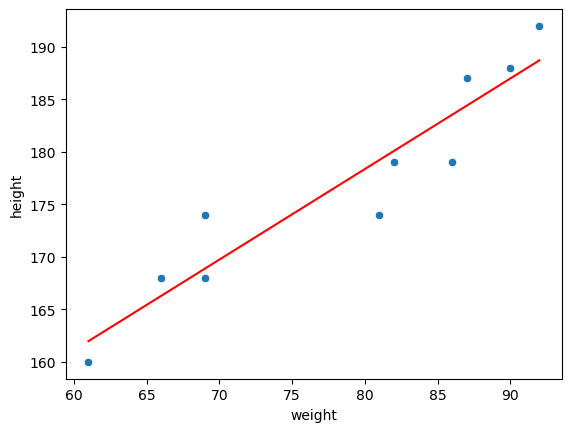

In [46]:
sns.scatterplot(data=df, x='weight', y='height')
sns.lineplot(data=df, x='weight', y='pred', color='red')

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [48]:
r2 = r2_score(df['height'], df['pred'])
r2

0.8899941488785352

In [50]:
mse_2 = mean_squared_error(df['height'], df['pred'])
mse_2

10.15243999999998

In [52]:
reg.predict(df[['weight']])

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [54]:
df2 = sns.load_dataset('tips')

In [55]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
y = df2[['tip']]
X = df2[['total_bill']]

In [72]:
reg2 = LinearRegression()
reg2.fit(X, y)

LinearRegression()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

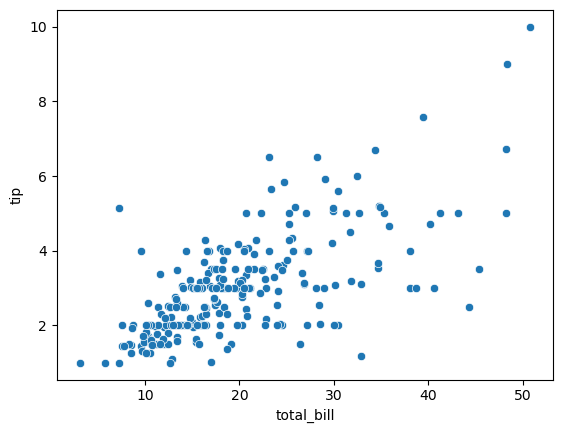

In [75]:
sns.scatterplot(data=df2, x='total_bill', y = 'tip')